## Renewal Process - Python 
       a. simulate sum of random variables of the different distributions to cross given number 
       b. simulate inspection paradox for discrete, Poisson and other continuous distributions
       c. Simulate renewal process given the distribution with parameters e.g. Uniform and the Normal.  Find theoretical values for such runs and also simulate and show values
       d. Visualize renewal process

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
import statistics as st

In [3]:
import matplotlib.pyplot as plt

### 1. Simulate sum of random variables of different distributions to cross given number 

#### Uniform Distribution


In [4]:
s = 0 #set sum = 0
count = 0 #set count = 0
countvec = [] #create a list to store counts of how many variables to be added

for i in range(10000):# for every iteration set initial values
    x = random.uniform(0,1)
    s = 0
    count = 0
    while s < 5:# keep iterating till sum >= 1
        s += x
        count += 1
        x = random.uniform(0,1)
    countvec.append(count) 


In [5]:
s

5.618081996894513

In [6]:
# in the long run, the number of uniform random variates
# needed to get a sum >= 1 
sum(countvec)/10000
# value approximates to e for uniform (0,1) where sum should cross 1

10.6651

In [7]:
#avg_counter = mean(countvec) 
#print ("avergae of rv counter",avg_counter)
max_counter = max(countvec)
print (max_counter)

for i in range (max_counter+1) :
    count = countvec.count(i)
    print (i, count)

23
0 0
1 0
2 0
3 0
4 0
5 0
6 15
7 233
8 871
9 1751
10 2109
11 1991
12 1427
13 869
14 409
15 202
16 79
17 29
18 11
19 3
20 0
21 0
22 0
23 1


#### Rolling of a die

In [8]:
s = 0 #set sum = 0
count = 0 #set count = 0
countvec = [] #create a list to store values of counts
die_roll = [1,2,3,4,5,6] # sample space for rolling a die
for i in range(10000):# for every iteration set initial values
    x = random.sample(die_roll,1)
    s = 0
    count = 0
    while s < 7:# keep iterating till sum >= 1
        s += x[0]
        count += 1
        x = random.sample(die_roll,1)
    countvec.append(count) 

In [9]:
x[0]

3

In [10]:
sum(countvec)/10000

2.5211

In [11]:
max_counter = max(countvec)
print (max_counter)

for i in range (max_counter+1) :
    count = countvec.count(i)
    print (i, count)

6
0 0
1 0
2 5807
3 3286
4 801
5 101
6 5


#### Normal distribution

In [12]:
s = 0 #set sum = 0
count = 0 #set count = 0
countvec = [] #create a list to store values of counts

for i in range(10):# for every iteration set initial values
    #x = np.random.normal(0.5,0.1)
    s = 0
    count = 0
    while s < 5:# keep iterating till sum < 1, stop as soon we cross 1 (sum >= 1)
        x = np.random.normal(0.5,0.1)
        s += x
        count += 1
        #x = np.random.normal(0.5,0.1)
    countvec.append(count) 

In [13]:
countvec # run time is higher, max iterations also very high, due to nature of distribution(spread of values)

[9, 10, 11, 10, 11, 11, 10, 10, 11, 11]

In [14]:
max(countvec)

11

In [15]:
st.mean(countvec) 

10.4

In [16]:
max_counter = max(countvec)
print (max_counter)
df = pd.DataFrame(columns = ['values','count'])
for i in range (max_counter+1) :
    count = countvec.count(i)
    print (i, count)

11
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 1
10 4
11 5


#### Combined code for Uniform/Normal distributions with parameters of choice

In [17]:
# choice of distribution
while True:
    dist = int(input('Choose Distribution: 1 - Normal, 2 - Uniform : ' ))
    if dist not in (1,2):
        print(" Please pick a number from the given list displayed")
    else:
        break

# number of parameters to input for corresponding distribution
param = dict({1:2, 2:2})
distribution = dict({1:'normal', 2:'uniform'})

# choose the values of parameter
paramlist = list()
for i in range(param[dist]):
    a = float(input('Enter numeric for parameter '+ str(i + 1) + ': '))
    paramlist.append(a)
    
# choose the number of iterations
iterations = int(input('Enter number of iterations: '))

# choose threshold
thresh = int(input('Enter threshold value: '))

# execute code for 
s = 0 #set sum = 0
count = 0 #set count = 0
countvec = [] #create a list to store values of counts

for i in range(iterations):# for every iteration set initial values for x,s,count
    x = eval(str('np.random.'+distribution[dist]))(paramlist[0],paramlist[1])
    s = 0
    count = 0
    while s < thresh:# keep iterating till sum just about to cross 1, stop after we cross 1 (sum <= 1)
        s += x
        count += 1
        x = eval(str('np.random.'+ distribution[dist]))(paramlist[0],paramlist[1])
    countvec.append(count) 
    
# display results
print(' ')
print('Chosen distribution -',distribution[dist],'(',paramlist[0],',',paramlist[1],')')
max_counter = max(countvec)
print('maximum number of variables to be added: ', max_counter)
print('mean number of variables to be added: ', st.mean(countvec))
print('percentage of number of variables to be added in ', iterations, ' iterations')
for i in range (max_counter+1) :
    count = countvec.count(i)
    print (i, count/iterations*100)

Choose Distribution: 1 - Normal, 2 - Uniform : 2
Enter numeric for parameter 1: 0
Enter numeric for parameter 2: 1
Enter number of iterations: 1000
Enter threshold value: 1
 
Chosen distribution - uniform ( 0.0 , 1.0 )
maximum number of variables to be added:  8
mean number of variables to be added:  2.756
percentage of number of variables to be added in  1000  iterations
0 0.0
1 0.0
2 47.4
3 35.199999999999996
4 13.4
5 2.8000000000000003
6 0.8999999999999999
7 0.2
8 0.1


### Inspection Paradox

In [18]:
t_list = list()
x = np.random.uniform(0.0,1.0,10) #inter arrival time of buses, can change distribution to exponential for poisson process

y=0
for i in x:
    y = y + i
    t_list.append(y)
    
print(t_list) # arrival time of buses (Tn)

[0.8158673031764094, 1.274415808569707, 1.4450449182630223, 1.9857203790356253, 2.2669015836986732, 3.066934987982298, 3.168324622350043, 3.431928460595154, 3.6035088300745417, 4.0850033400799965]


In [19]:
# passenger arrival time
p_arrivals = np.random.uniform(0, max(t_list),100)
p_arrivals

array([3.20288923, 0.27806927, 2.43618503, 1.65185447, 0.90773244,
       0.95537684, 0.84394292, 3.26678445, 0.35006724, 0.0719579 ,
       3.82105312, 3.24692711, 1.4898187 , 3.95054238, 2.65513788,
       0.39669933, 0.86635601, 2.07470012, 3.06261758, 0.37551443,
       2.39414301, 0.7885379 , 1.04985164, 1.47615017, 3.97131961,
       3.09463964, 3.21962492, 2.00818605, 3.61801559, 3.32971466,
       2.32144335, 0.48324059, 4.0719295 , 1.75740201, 3.29266145,
       3.45595705, 3.65557174, 1.03971898, 1.55502097, 0.93956613,
       0.8614222 , 0.34224576, 2.90715843, 2.9394659 , 3.35434726,
       2.17118821, 0.94595599, 0.76312019, 2.88285369, 2.13686693,
       2.48499072, 4.01688044, 3.58671792, 1.28672205, 3.57158548,
       2.56538557, 1.87535027, 0.07643784, 3.33259896, 1.82055141,
       4.06447342, 3.35456959, 3.97443225, 0.18657906, 2.81224415,
       2.23857289, 4.07156301, 2.01232586, 0.05513792, 3.7682209 ,
       0.04537554, 0.70311113, 3.47015809, 0.96973879, 1.41822

In [20]:
index = np.searchsorted(t_list, p_arrivals, side='right') # mapping index for passenger arrival

In [21]:
index

array([7, 0, 5, 3, 1, 1, 1, 7, 0, 0, 9, 7, 3, 9, 5, 0, 1, 4, 5, 0, 5, 0,
       1, 3, 9, 6, 7, 4, 9, 7, 5, 0, 9, 3, 7, 8, 9, 1, 3, 1, 1, 0, 5, 5,
       7, 4, 1, 0, 5, 4, 5, 9, 8, 2, 8, 5, 3, 0, 7, 3, 9, 7, 9, 0, 5, 4,
       9, 4, 0, 9, 0, 0, 8, 1, 2, 9, 9, 0, 8, 2, 0, 9, 2, 2, 0, 5, 3, 9,
       1, 0, 0, 1, 7, 6, 7, 5, 4, 0, 9, 2], dtype=int64)

In [22]:
x

array([0.8158673 , 0.45854851, 0.17062911, 0.54067546, 0.2811812 ,
       0.8000334 , 0.10138963, 0.26360384, 0.17158037, 0.48149451])

In [23]:
int_arrivals_p = list()
for i in range(len(p_arrivals)):
    int_arrivals_p.append(x[index[i]])

In [24]:
int_arrivals_p[0:10]

[0.263603838245111,
 0.8158673031764094,
 0.8000334042836247,
 0.5406754607726031,
 0.4585485053932975,
 0.4585485053932975,
 0.4585485053932975,
 0.263603838245111,
 0.8158673031764094,
 0.8158673031764094]

In [25]:
sum(int_arrivals_p)/len(int_arrivals_p) # Average inter arrival time from passenger point of view

0.5120204465783288

In [26]:
x.mean() # Average inter arrival time of buses

0.4085003340079997

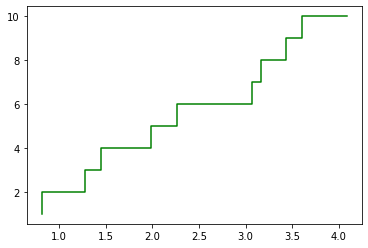

In [27]:
plt.step(t_list,[i for i in range(1,11)], 'g', where='pre') # t_list bus arrival time, i - ith renewal
plt.show()

### Simulate Renewal Process

#### Renewal for Poisson process

In [28]:
# single simulation
T=30 #time that system is observed
t=0 # arrival time
n=0 # number of renewal
list1=[] # list of interarrival time
arrivals=[] # list of arrival times
while t<T:
    x=np.random.exponential(5)# on an average interarrival time is approx 5 minutes
    t=t+x
    n=n+1
    list1.append(x) # inter arrival times
    arrivals.append(t) # arrival times
    

In [29]:
n

6

In [30]:
arrivals

[22.262684554227278,
 23.372439916691725,
 25.025834045015507,
 25.42063636481306,
 27.92288960033529,
 40.192154919555676]

In [31]:
# 1000 simulations
T=100 #time 30
Nt=[]
for i in range (0,1000):
    t=0
    n=0
    while t<T :
        x=np.random.exponential(5) #inter arrival
        t=t+x # arrival
        n=n+1 # number of renewals
    Nt.append(n) # total renewals in time T for 1000 iterations

In [32]:
len(Nt)

1000

In [33]:
# limiting behavior of poisson process
sum(Nt)/(T*1000) # this value should approx 1/5 where 5 is the mean inter arrival time

0.20958

In [34]:
sum(Nt)/len(Nt) # average no. of renewals should be similar to n (theoretical/ analytical solution)

20.958

#### Visualization of Renewal process

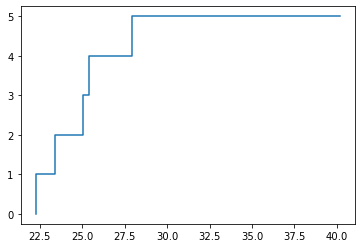

In [35]:
plt.step(arrivals,[x for x in range(0,len(arrivals))])
plt.show()

In [36]:
arrivals

[22.262684554227278,
 23.372439916691725,
 25.025834045015507,
 25.42063636481306,
 27.92288960033529,
 40.192154919555676]

#### Uniform/Normal distn of inter arrival

In [37]:
# single simulation -  theoretical
T=30 #time that system is observed
t=0 # arrival time
n=0 # number of renewal
list1=[] # list of interarrival time
arrivals=[] # list of arrival times
while t<T:
    x=np.random.uniform(0.5,1) # distribution of interarrival time can try normal
    t=t+x
    n=n+1
    list1.append(x) # inter arrival times
    arrivals.append(t) # arrival times
    

In [38]:
n

41

In [39]:
# 1000 simulations
T=30 #time 30
Nt=[]
for i in range (0,1000):
    t=0
    n=0
    while t<T :
        x=np.random.uniform(0.5,1) #inter arrival distribution
        t=t+x # arrival
        n=n+1 # number of renewals
    Nt.append(n) # total renewals in time T for 100 iterations

In [40]:
# limiting behaviour of Renewal process
sum(Nt)/(T*1000) # should approximate 1/mean of distribution ~ 1/0.75

1.3523333333333334

In [41]:
1/.75

1.3333333333333333

In [42]:
sum(Nt)/len(Nt) # should approximate value of n (analytical no. of renewals)

40.57

#### Visualization of Renewal process

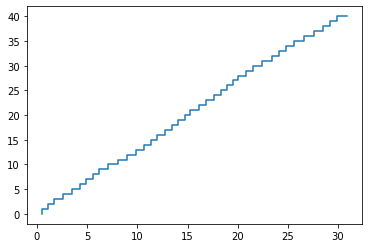

In [43]:
plt.step(arrivals,[x for x in range(0,len(arrivals))])
plt.show()